Ingrese los 4 elementos de la matriz 2x2 del sistema de ecuaciones diferenciales:
Formato: a b c d (por ejemplo, 6 -4 1 2): 1 -2 -2 -1

Sistema de ecuaciones diferenciales:
dx/dt = 1.0*x + -2.0*y
dy/dt = -2.0*x + -1.0*y

Vectores propios:
Vector propio 1: [0.851, -0.526] asociado a λ = 2.236+0.000j
Vector propio 2: [0.526, 0.851] asociado a λ = -2.236+0.000j

Valores propios: [ 2.23606798+0.j -2.23606798+0.j]
Discriminante: 20.000000000000004
Clasificación: Valores propios reales


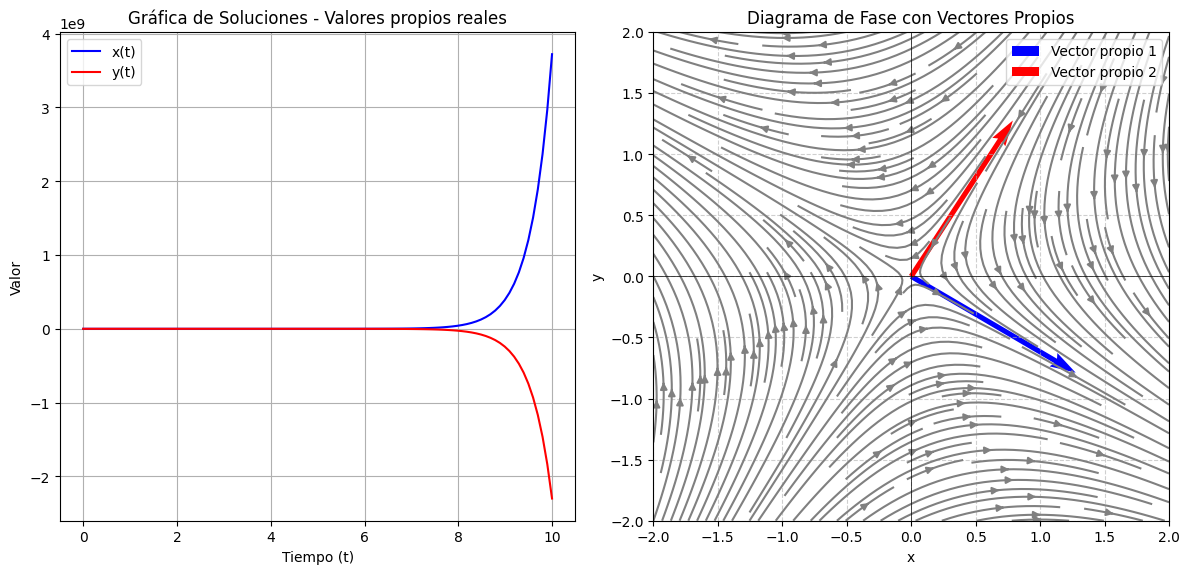

In [32]:
# Importacion de las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.integrate import odeint

# Función para ingresar la matriz del sistema de ecuaciones diferenciales 2x2

#Nuestro programa requiere de una codificacion en donde podamos ingresar de manera
#dinamica sistemas de ecuaciones en forma matricial, de 2x2, para este caso,
# el programa nos devolvera un cuadro donde podremos escribir los valores de
#la matriz seguidos de espacios por ejemplo ( 1 -2 -2 -1 ). De un a forma dinámica
#hememos utilizado las siguientes codificaciones

#def: se utiliza para definir las funciones.
#print: para proporcionar la directriz de la ecuación.
#input: para obtener los datos requeridos.
#return: para devolver a la matriz.

def ingresar_matriz():
    print("Ingrese los 4 elementos de la matriz 2x2 del sistema de ecuaciones diferenciales:")
    elementos = input("Formato: a b c d (por ejemplo, 6 -4 1 2): ").split()
    matriz = np.array([[float(elementos[0]), float(elementos[1])],
                       [float(elementos[2]), float(elementos[3])]])
    return matriz

# Función para escribir el sistema de ecuaciones diferenciales

#Definimos la entrada del sistema de ecuaciones, para cada fila con la funcion def escribir_sistema(A).
#La función recibe una matriz ( A ) de 2x2, que contiene los coeficientes de las ecuaciones diferenciales.
#Variables: Extrae los elementos de la matriz ( A )

def escribir_sistema(A):
    a11, a12 = A[0, 0], A[0, 1]
    a21, a22 = A[1, 0], A[1, 1]
    print("\nSistema de ecuaciones diferenciales:")
    print(f"dx/dt = {a11}*x + {a12}*y")
    print(f"dy/dt = {a21}*x + {a22}*y")

# Función para calcular los valores propios y el discriminante

#Recogemos los valores ingresados por los que se realizara el calculo de los valores propios en base al
#calculo de la discriminante.

def calcular_valores_vectores_propios(A):
    eigenvalues, eigenvectors = eig(A)
    discriminante = (A[0, 0] + A[1, 1])**2 - 4 * np.linalg.det(A)
    return eigenvalues, eigenvectors, discriminante

# Función para escribir los vectores propios

#Dado el caso, se ingresa la codificacion para que el programa exprese los vectores propios de la
#solucion.

def escribir_vectores_propios(eigenvalues, eigenvectors):
    print("\nVectores propios:")
    for i in range(len(eigenvalues)):
        print(f"Vector propio {i+1}: [{eigenvectors[0, i]:.3f}, {eigenvectors[1, i]:.3f}] asociado a λ = {eigenvalues[i]:.3f}")

# Función para resolver el sistema de ecuaciones diferenciales

#La resolucion de los sistemas de ecuaciones diferenciales se basa de acuerdo al calculo de la
#determinante, y las condiciones iniciales

def resolver_sistema(A, t, condiciones_iniciales):
    def sistema(y, t):
        return np.dot(A, y)

    sol = odeint(sistema, condiciones_iniciales, t)
    return sol

# Resolucion y grafias de soluciones (x y y) con el tiempo y diagrama de fase

# Grafica de soluciones x(t) y y(t)

def graficar_soluciones(t, soluciones, caso, ax):
    # Graficar x(t) y y(t)
    ax.plot(t, soluciones[:, 0], label="x(t)", color="b")
    ax.plot(t, soluciones[:, 1], label="y(t)", color="r")
    ax.set_xlabel("Tiempo (t)")
    ax.set_ylabel("Valor")
    ax.set_title(f"Gráfica de Soluciones - {caso}")
    ax.legend()
    ax.grid(True)

# Diagrama de fase (x vs y) con el campo vectorial

def graficar_diagrama_fase(A, eigenvectors, ax):
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)
    U = A[0, 0] * X + A[0, 1] * Y
    V = A[1, 0] * X + A[1, 1] * Y

    ax.streamplot(X, Y, U, V, color='gray', density=2, arrowsize=1)

# Colores para los vectores propios

#Se define las condiciones del diagrama de fase, colores de los vectores propios azul
#y rojo, ademas de los titulos de insercion en las graficas

    colores = ['b', 'r']  # Azul para el primero, rojo para el segundo

    for i in range(eigenvectors.shape[1]):
        vector = eigenvectors[:, i] / np.linalg.norm(eigenvectors[:, i]) * 1.5
        ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1,
                  color=colores[i], width=0.01, label=f"Vector propio {i+1}")

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Diagrama de Fase con Vectores Propios")
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

# Función principal

# def main Esta línea define la función principal del programa, donde se ejecutarán las
# operaciones principales para analizar el sistema.

def main():


    A = ingresar_matriz() # 1. Ingresar la matriz de coeficientes del sistema
                               #En este apartado se ingrea la matriz

    escribir_sistema(A) # 2. Escribir el sistema de ecuaciones diferenciales
                          # Muestra el sistema de ecuaciones diferenciales asociado a la matriz ( A ).
                          # Esto ayuda a los usuarios a visualizar el problema que están analizando

    eigenvalues, eigenvectors, discriminante = calcular_valores_vectores_propios(A)
    # 3. Calcular los valores propios y el discriminante
    # calcula los valores propios (eigenvalues) y los vectores propios (eigenvectors)
    # de la matriz ( A ). También se calcula un "discriminante",
    # que puede ser utilizado para clasificar el tipo de soluciones del sistema.

    escribir_vectores_propios(eigenvalues, eigenvectors)  # 4. Imprimir los vectores propios
                                                               # Devuelve los vectores propios que calculamos

# Clasificación de los casos según el discriminante

    caso = ""
    if np.all(np.isreal(eigenvalues)):  # Caso 1: Valores propios reales
        if np.isclose(eigenvalues[0], eigenvalues[1]):  # Caso 2: Jordan
            caso = "Caso Jordan"
        else:
            caso = "Valores propios reales"
    else:  # Caso 3: Valores propios complejos
        caso = "Valores propios complejos"

    print(f"\nValores propios: {eigenvalues}")
    print(f"Discriminante: {discriminante}")
    print(f"Clasificación: {caso}")

# Se determina el caso de la matriz con el que se esta trabajando, dependiendo
# del valor del discriminante (np.isreal): si todos los valores son reales, nos
# encontramos en el caso de valores propios reales.
# Otro caso es el de si nos presentamos en raices reales e iguales que corresponde
# al caso de Jordan, y por ultimo el caso 3, si hablamos dell caso de valores complejos.

# Resolver el sistema con condiciones iniciales arbitrarias (por ejemplo, [1, 0])

    t = np.linspace(0, 10, 100)  # Tiempo de 0 a 10
    condiciones_iniciales = [1, 0]  # Condiciones iniciales
    soluciones = resolver_sistema(A, t, condiciones_iniciales)

# Crear una figura con dos subgráficos

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graficar en los subgráficos

    graficar_soluciones(t, soluciones, caso, axs[0])
    graficar_diagrama_fase(A, eigenvectors, axs[1])

# Mostrar ambas gráficas juntas

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
